In [2]:

import networkx as nx #for graphs
import matplotlib.pyplot as plt #for plotting
import numpy as np
import pandas as pd
from collections import Counter


In [4]:
#load categories
categories = pd.read_csv("../DS/wikispeedia_paths-and-graph/categories.tsv",
                         sep="\t",
                         header=None,
                         names=["article_id", "category"],
                         comment="#").dropna()


G=nx.from_pandas_edgelist(categories, source="article_id", target="category", create_using=nx.DiGraph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

print(list(G.nodes())[:10]) #shows if we need to clean data
print(type(list(G.nodes())[0])) #we want class str here

#load links
links = pd.read_csv(
    "../DS/wikispeedia_paths-and-graph/links.tsv",
    sep="\t",
    header=None,
    names=["source", "target"],
    comment="#"
).dropna()

print(categories.head())

Number of nodes: 4727
Number of edges: 5204
['%C3%81ed%C3%A1n_mac_Gabr%C3%A1in', 'subject.History.British_History.British_History_1500_and_before_including_Roman_Britain', 'subject.People.Historical_figures', '%C3%85land', 'subject.Countries', 'subject.Geography.European_Geography.European_Countries', '%C3%89douard_Manet', 'subject.People.Artists', '%C3%89ire', '%C3%93engus_I_of_the_Picts']
<class 'str'>
                         article_id  \
0  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in   
1  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in   
2                        %C3%85land   
3                        %C3%85land   
4                %C3%89douard_Manet   

                                            category  
0  subject.History.British_History.British_Histor...  
1                  subject.People.Historical_figures  
2                                  subject.Countries  
3  subject.Geography.European_Geography.European_...  
4                             subject.People.Artists  


In [ ]:
#BY SUB CATEGORY
print(categories.columns)# i only want main cat

article_to_category = dict(zip(categories["article_id"], categories["category"]))
print(article_to_category["Bede"]) #now contains subject, main cat and sub cat
print(categories.columns)# i only want main cat



#MAIN CATEORY ONLY
'''
categories["main_category"] = categories["category"].apply(lambda x: x.split(".")[1]) #.apply does apply the func to every element of the Series
print(categories[["article_id", "main_category"]].head())

article_to_category = dict(zip(categories["article_id"],categories["main_category"]))
print(article_to_category["Bede"]) #better :)
'''


Index(['article_id', 'category', 'main_category'], dtype='str')
subject.History.Historians_chroniclers_and_history_books
Index(['article_id', 'category', 'main_category'], dtype='str')


'\ncategories["main_category"] = categories["category"].apply(lambda x: x.split(".")[1]) #.apply does apply the func to every element of the Series\nprint(categories[["article_id", "main_category"]].head())\n\narticle_to_category = dict(zip(categories["article_id"],categories["main_category"]))\nprint(article_to_category["Bede"]) #better :)\n'

In [45]:
#build list of category edges

category_edges = []
print(links.head())
for _, row in links.iterrows(): #iterrows is pandas generator method used to loop over rows in a DataFrame as (index, Series) pairs
    src = row["source"]
    print(src)
    tgt = row["target"]
    print(tgt)
    
    if src in article_to_category and tgt in article_to_category: #check if both source and target articles have a category
        src_cat = article_to_category[src]
        tgt_cat = article_to_category[tgt]
        category_edges.append((src_cat, tgt_cat)) #append the category edge to the list

                             source          target
0  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in            Bede
1  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in         Columba
2  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in  D%C3%A1l_Riata
3  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in   Great_Britain
4  %C3%81ed%C3%A1n_mac_Gabr%C3%A1in         Ireland
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Bede
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Columba
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
D%C3%A1l_Riata
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Great_Britain
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Ireland
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Isle_of_Man
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Monarchy
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Orkney
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Picts
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Scotland
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in
Wales
%C3%85land
20th_century
%C3%85land
Baltic_Sea
%C3%85land
Crimean_War
%C3%85land
Currency
%C3%85land
Euro
%C3%85land
European_Union
%C3%85land
Finland
%C3%85land
League_of_Nations
%C3%85land
List_of_countries_by_system_of_gover

In [46]:
G_cat = nx.DiGraph()
G_cat.add_edges_from(category_edges)

print("Number of categories:", G_cat.number_of_nodes())
print("Number of inter-category edges:", G_cat.number_of_edges())

Number of categories: 127
Number of inter-category edges: 8806


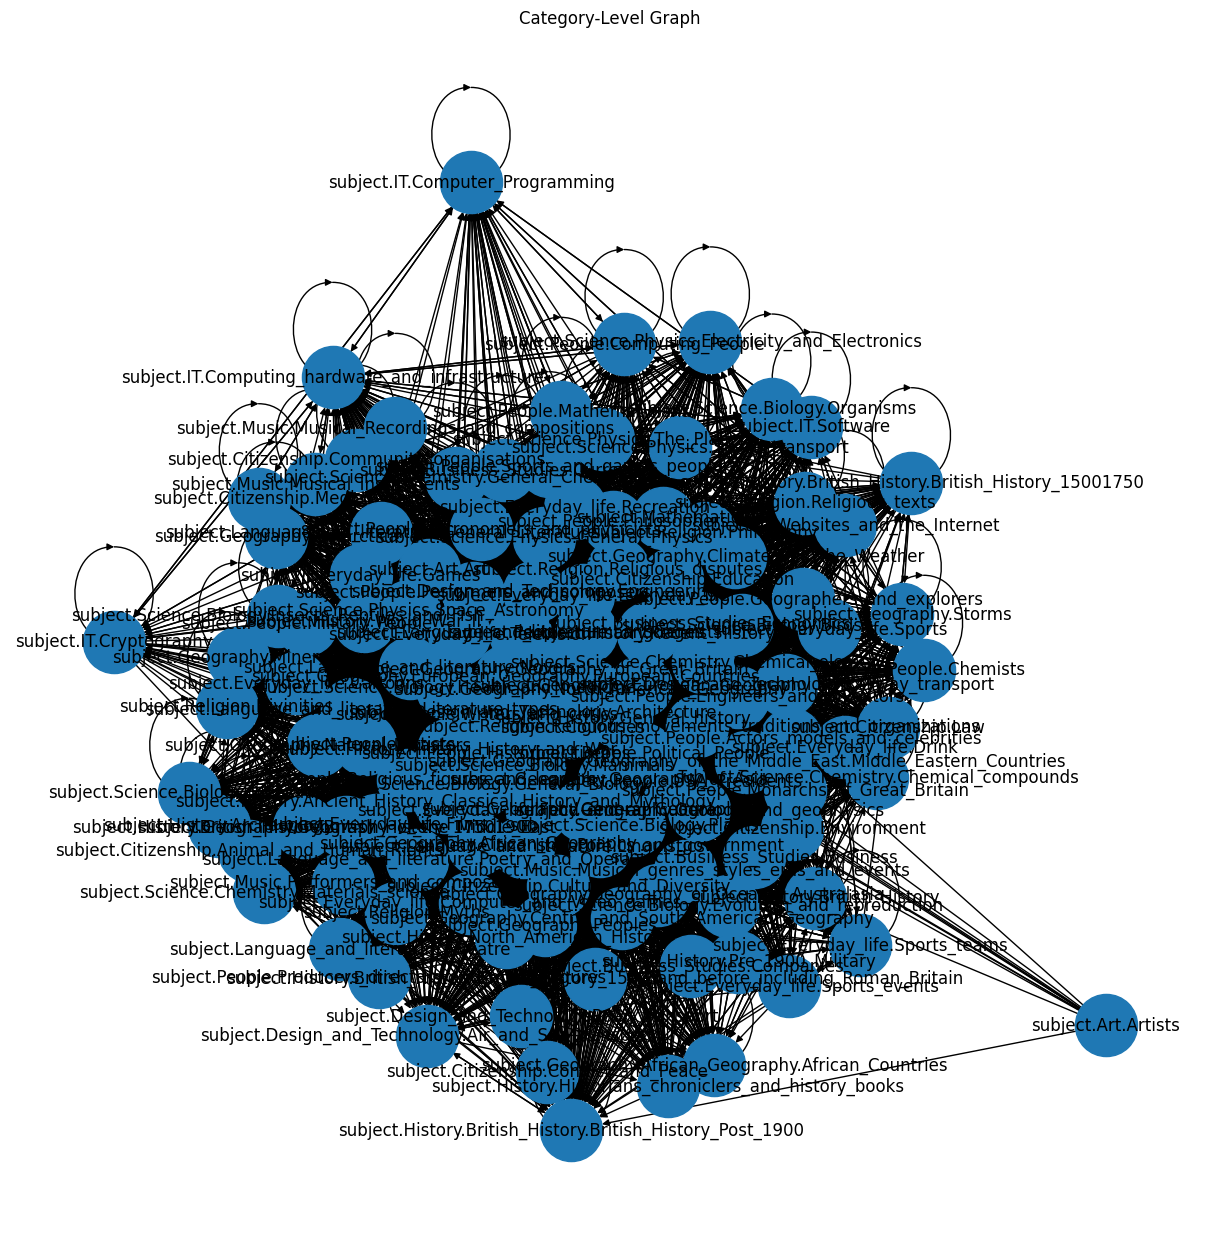

In [47]:
#visualize

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G_cat, k=0.8)

nx.draw(
    G_cat,
    pos,
    with_labels=True,
    node_size=2000,
)

plt.title("Category-Level Graph")
plt.show()

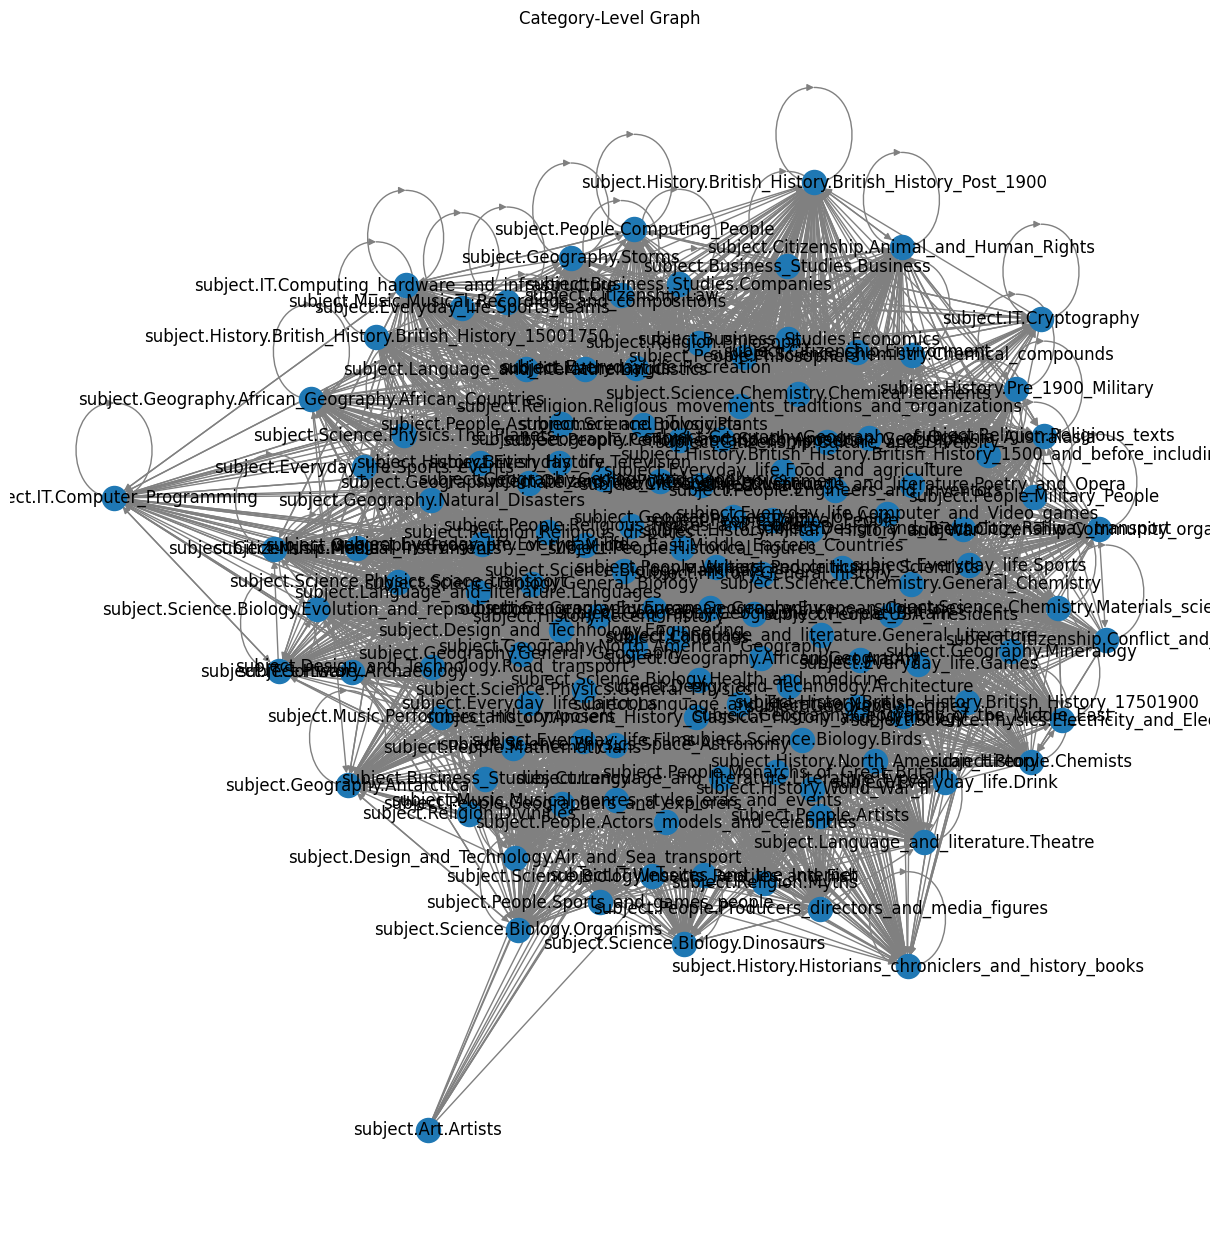

In [ ]:
#visualize 

plt.figure(figsize=(12,12))

pos = nx.spring_layout(G_cat, k=1)

nx.draw(
    G_cat,
    pos,
    with_labels=True,
    edge_color="gray",
    
)

plt.title("Category-Level Graph")
plt.show()